### This is an example of an Extract Transform and load (ETL) exercise. originally we have the file 'Sales.csv' where all the records were not entered the same way (I invite you to open the file in a text editor like notepad). Some records lines are embedded in "" and others not. You will also notice inside lines some strings are written inside "" "" instead of "". In this notebook we will see how to transform those mistakes in the file in order to fully exploit the data.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import re   # this is a module for the treatment of regular expressions

### Let see what we see when we simply load data without transformations

In [2]:
df=pd.read_csv('Sales.csv', encoding='latin_1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### we see many variables have a lot of missing values  compared to the 2823 values that they should actually have

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null object
QUANTITYORDERED     1508 non-null float64
PRICEEACH           1508 non-null float64
ORDERLINENUMBER     1508 non-null float64
SALES               1508 non-null float64
ORDERDATE           1508 non-null object
STATUS              1508 non-null object
QTR_ID              1508 non-null float64
MONTH_ID            1508 non-null float64
YEAR_ID             1508 non-null float64
PRODUCTLINE         1508 non-null object
MSRP                1508 non-null float64
PRODUCTCODE         1508 non-null object
CUSTOMERNAME        1508 non-null object
PHONE               1508 non-null object
ADDRESSLINE1        1508 non-null object
ADDRESSLINE2        139 non-null object
CITY                1508 non-null object
STATE               1039 non-null object
POSTALCODE          1446 non-null object
COUNTRY             1508 non-null object
TERRITORY           495 n

#### Now let us write a function that will make some transformations when necessary on lines

In [33]:
def read_line(line):
    if line[0] == "\"":
        line = line[1:-2]
    else:
        line = line[:-1]
    if "\"\"" in line:
        line = line.replace("\"\"", "\"")
           
    for string in re.findall('".*?"',line):
        line = line.replace(string,string.replace(",",""))  
        line = line.replace("\'\"", "\"")
        line = line.replace("\"\'", "\"")
    return line
    
                            

        

In [41]:

with open('Sales.csv', "r")as f:
    data=[read_line(line).split(sep=",") for line in f]
    
df=pd.DataFrame(data[1:], columns=data[0])

In [40]:
df[0:10]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,,San Francisco,CA,,USA,NA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,,Burlingame,CA,94217,USA,NA,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"""184 chausse de Tournai""",,Lille,,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"""Drammen 121 PR 744 Sentrum""",,Bergen,,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,,San Francisco,CA,,USA,NA,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"""25 rue Lauriston""",,Paris,,75016,France,EMEA,Perrier,Dominique,Medium


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null object
QUANTITYORDERED     2823 non-null object
PRICEEACH           2823 non-null object
ORDERLINENUMBER     2823 non-null object
SALES               2823 non-null object
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null object
MONTH_ID            2823 non-null object
YEAR_ID             2823 non-null object
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null object
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        2823 non-null object
CITY                2823 non-null object
STATE               2823 non-null object
POSTALCODE          2823 non-null object
COUNTRY             2823 non-null object
TERRITORY           2823 non-nul

### rechanging types of some variables. we see that now the variables have all full information. Our ETL process succeeds

In [42]:
df=df.astype({"ORDERNUMBER":'int',"QUANTITYORDERED":'int',"ORDERLINENUMBER":'int',"QTR_ID":'int',"MONTH_ID":'int',
             "YEAR_ID":'int',
             "MSRP":'int',
              "SALES":'float',
              "PRICEEACH":'float'
             })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int32
QUANTITYORDERED     2823 non-null int32
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int32
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int32
MONTH_ID            2823 non-null int32
YEAR_ID             2823 non-null int32
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int32
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        2823 non-null object
CITY                2823 non-null object
STATE               2823 non-null object
POSTALCODE          2823 non-null object
COUNTRY             2823 non-null object
TERRITORY           2823 non-null obj

In [45]:
ProfileReport(df)

C:\Users\Alfa\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,25
Number of observations,2823
Total Missing (%),0.0%
Total size in memory,474.3 KiB
Average record size in memory,172.0 B
Numeric,7
Categorical,16
Boolean,0
Date,0
Text (Unique),0
Rejected,2


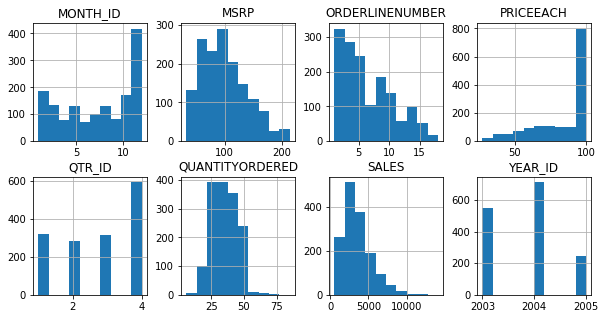

In [4]:
df.hist(figsize=(10,5), layout=(2,4));

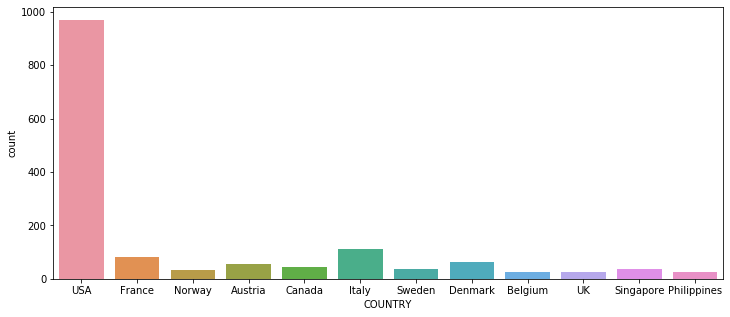

In [14]:
fig=plt.figure(figsize=(12,5))
sns.countplot(x='COUNTRY', data=df);

In [47]:
df.to_csv('Clean_data.csv')